<a href="https://colab.research.google.com/github/igormartins0301/Analises_exploratorias_dados/blob/main/An%C3%A1lise%20explorat%C3%B3ria%20IBOV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Objetivo do Trabalho


* Realize uma análise estatística descritiva dos dados do Ibovespa
(“Dados_Ibovespa”).
* Utilizando tabelas e/ou gráficos, identifique informações relevantes que
podem ser extraídas dos dados.
* Faça uma breve conclusão para o estudo realizado

In [ ]:
import pandas as pd
import seaborn as srn
import statistics as sts
import matplotlib.pyplot as plt



In [ ]:
# Importar dados
df = pd.read_csv('/content/dados_ibovespa.csv', sep = ',')

In [ ]:
# Visualizar dados
df.head()

,Data,Último,Abertura,Máxima,Mínima,Vol.,Var%
0,08.03.2022,111.610,111.594,111.703,111.590,"32,44K","0,01%"
1,07.03.2022,111.593,114.469,114.529,111.140,"14,06M","-2,52%"
2,04.03.2022,114.474,115.166,115.166,113.389,"10,72M","-0,60%"
3,03.03.2022,115.166,115.173,115.948,115.010,"12,12M","-0,01%"
4,02.03.2022,115.174,113.143,115.429,113.143,"10,70M","1,80%"


In [ ]:
#Tamanho do Dataset = 541 linhas e 7 colunas
df.shape

(541, 7)

In [ ]:
# Entendo qual o tipo de cada coluna
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Data      541 non-null    object 
 1   Último    541 non-null    float64
 2   Abertura  541 non-null    float64
 3   Máxima    541 non-null    float64
 4   Mínima    541 non-null    float64
 5   Vol.      541 non-null    object 
 6   Var%      541 non-null    object 
dtypes: float64(4), object(3)
memory usage: 29.7+ KB


### Tratamento e Limpeza dos Dados

Não existem linhas dados vazios.

O primeiro tratamento será nas colunas 'Vol.' e 'Var%', onde estão como colunas categóricas mas precisam ser consideradas colunas numéricas.

In [ ]:
x = []
for i in df['Var%']:
  i=i.replace('%','')
  i=i.replace(',','.')
  x.append(i)


In [ ]:

df['Var%'] = x
df['Var%'] = df['Var%'].astype(float)

In [ ]:
x = []
for i in df['Vol.']:
  i = i.replace(',','')

  if 'K' in i:
    i = i.replace('K','')
    i = int(i)
    i = i*10
  else:
    i = i.replace('M','')
    i= int(i)
    i = i*10000
  x.append(i)


In [ ]:
df['Vol.']= x

In [ ]:
from datetime import datetime
x = []
for i in df['Data']:
  str_date = i
  i = datetime.strptime(str_date, '%d.%m.%Y').date()
  x.append(i)
df['Data'] = x

In [ ]:
df['Data'] = pd.to_datetime(df['Data'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Data      541 non-null    datetime64[ns]
 1   Último    541 non-null    float64       
 2   Abertura  541 non-null    float64       
 3   Máxima    541 non-null    float64       
 4   Mínima    541 non-null    float64       
 5   Vol.      541 non-null    int64         
 6   Var%      541 non-null    float64       
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 29.7 KB


In [ ]:
df.head()

,Data,Último,Abertura,Máxima,Mínima,Vol.,Var%
0,2022-03-08,111.610,111.594,111.703,111.590,32440,0.01
1,2022-03-07,111.593,114.469,114.529,111.140,14060000,-2.52
2,2022-03-04,114.474,115.166,115.166,113.389,10720000,-0.60
3,2022-03-03,115.166,115.173,115.948,115.010,12120000,-0.01
4,2022-03-02,115.174,113.143,115.429,113.143,10700000,1.80


In [ ]:
#Explorar colunas numéricas.
df.describe()

,Último,Abertura,Máxima,Mínima,Vol.,Var%
count,541.000000,541.000000,541.000000,541.000000,5.410000e+02,541.000000
mean,107.955471,107.963514,109.126044,106.777937,1.000427e+07,0.016470
std,13.743876,13.746698,13.387322,14.031022,2.617350e+06,2.124608
min,63.570000,63.604000,67.604000,61.691000,3.244000e+04,-14.780000
25%,100.925000,100.954000,102.020000,99.857000,8.260000e+06,-0.920000
50%,111.107000,111.117000,112.415000,110.087000,9.780000e+06,0.090000
75%,117.869000,117.866000,118.812000,116.756000,1.150000e+07,1.090000
max,130.776000,130.776000,131.190000,129.526000,2.177000e+07,13.910000


Com base no conhecimento do mercado financeiro, pode-se notar que o volume do dia 08/03/2022 está muito menor que a média do volume dos outros dias, o que indica que no momento em que os dados foram extraídos, esse pregão ainda não tinha chego ao fim, portanto vou excluir essa linha do Dataset.

In [ ]:
df.drop(0, axis = 0, inplace = True)
df.head()

,Data,Último,Abertura,Máxima,Mínima,Vol.,Var%
1,2022-03-07,111.593,114.469,114.529,111.140,14060000,-2.52
2,2022-03-04,114.474,115.166,115.166,113.389,10720000,-0.60
3,2022-03-03,115.166,115.173,115.948,115.010,12120000,-0.01
4,2022-03-02,115.174,113.143,115.429,113.143,10700000,1.80
5,2022-02-25,113.142,111.591,113.142,110.673,17560000,1.39


### Análise exploratória

In [ ]:
# Explorando as variáveis numéricas
df.describe()

,Último,Abertura,Máxima,Mínima,Vol.,Var%
count,540.000000,540.000000,540.000000,540.000000,5.400000e+02,540.000000
mean,107.948704,107.956791,109.121272,106.769026,1.002274e+07,0.016481
std,13.755717,13.758554,13.399275,14.042499,2.584261e+06,2.126578
min,63.570000,63.604000,67.604000,61.691000,3.840000e+06,-14.780000
25%,100.907250,100.928750,101.963000,99.852000,8.260000e+06,-0.920000
50%,111.043000,111.048500,112.421500,110.061500,9.780000e+06,0.090000
75%,117.877750,117.875500,118.821500,116.793500,1.150000e+07,1.097500
max,130.776000,130.776000,131.190000,129.526000,2.177000e+07,13.910000


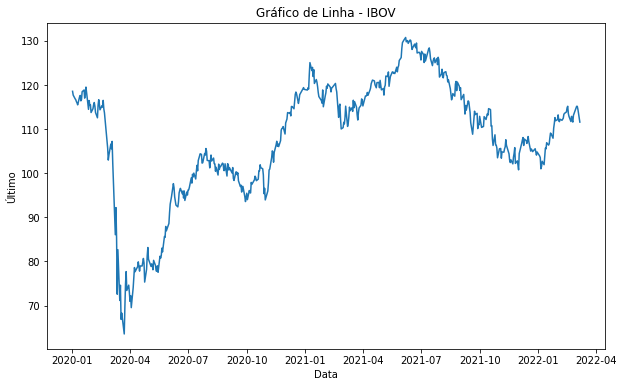

In [ ]:
plt.figure(figsize=(10, 6))
plt.xlabel('Data')
plt.ylabel('Último')
plt.title('Gráfico de Linha - IBOV')
plt.plot(df['Data'],df['Último'])

Analisando quais foram os melhores dias de negociação do período

In [ ]:
melhores_dias = df.sort_values('Var%',ascending=False)
melhores_dias.head(5)

,Data,Último,Abertura,Máxima,Mínima,Vol.,Var%
491,2020-03-13,82.678,72.621,83.758,72.621,15770000,13.91
484,2020-03-24,69.729,63.604,71.535,63.604,11680000,9.69
483,2020-03-25,74.956,69.727,76.714,69.360,12950000,7.50
494,2020-03-10,92.214,86.071,92.230,86.071,13530000,7.14
475,2020-04-06,74.073,69.556,75.260,69.556,9690000,6.52


Analisando quais foram os piores dias de negociação do período

In [ ]:
maiores_quedas = df.sort_values('Var%',ascending=True)
maiores_quedas.head(5)

,Data,Último,Abertura,Máxima,Mínima,Vol.,Var%
492,2020-03-12,72.583,85.103,85.103,68.488,12010000,-14.78
490,2020-03-16,71.168,82.565,82.565,70.855,12850000,-13.92
495,2020-03-09,86.067,97.982,97.982,85.880,14650000,-12.17
488,2020-03-18,66.895,74.576,74.576,63.547,16750000,-10.35
493,2020-03-11,85.171,92.202,92.202,80.796,11790000,-7.64


Analisando a distribuição da variação percentual diária

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



Text(0.5, 1.0, 'Variação Percentual')

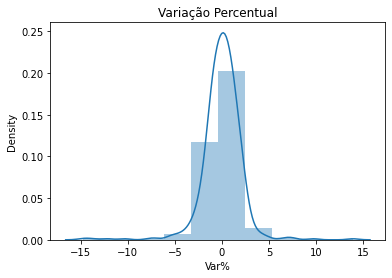

In [ ]:
srn.distplot(df['Var%'], bins = 10, axlabel='Var%').set_title('Variação Percentual')

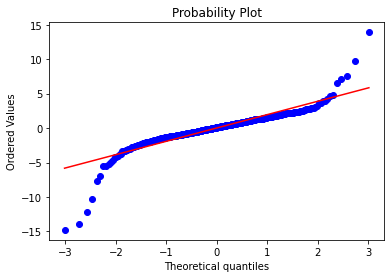

In [ ]:
# Geração de gráfico para conferir a linha de distribuição padrão e os nossos dados
fig, ax = plt.subplots()
stats.probplot(df['Var%'], fit=True,   plot=ax)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0.5, 1.0, 'Variação Percentual')

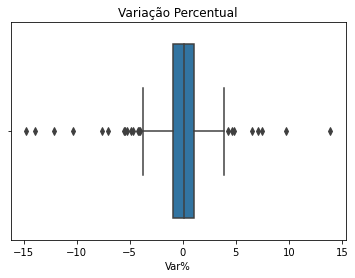

In [ ]:
# Boxplot para identificar a quantidade alta de Outliers na variação percentual.
srn.boxplot(df['Var%']).set_title('Variação Percentual')

In [ ]:
from scipy import stats
stats.shapiro(df['Var%'])

ShapiroResult(statistic=0.8302918076515198, pvalue=1.6442273601454052e-23)

Analisando a amostragem, podemos notar que os dados não são normalizados (Shapiro Wilk > 5% negando a hipótese nula)

Porém, com o conhecimento do negócio (mercado financeiro), não podemos desconsiderar os outliers substituindo-os pela mediana, pois neste caso, os outliers explicam o momento atípico que está sendo estudado.

In [ ]:
df.describe()

,Último,Abertura,Máxima,Mínima,Vol.,Var%
count,540.000000,540.000000,540.000000,540.000000,5.400000e+02,540.000000
mean,107.948704,107.956791,109.121272,106.769026,1.002274e+07,0.016481
std,13.755717,13.758554,13.399275,14.042499,2.584261e+06,2.126578
min,63.570000,63.604000,67.604000,61.691000,3.840000e+06,-14.780000
25%,100.907250,100.928750,101.963000,99.852000,8.260000e+06,-0.920000
50%,111.043000,111.048500,112.421500,110.061500,9.780000e+06,0.090000
75%,117.877750,117.875500,118.821500,116.793500,1.150000e+07,1.097500
max,130.776000,130.776000,131.190000,129.526000,2.177000e+07,13.910000


### Conclusão da Análise exploratória

Após a análise exploratória, podemos observar algumas características importantes sobre os dados do IBOV no período.



1.   O período analisado foi de alta volatilidade, causado pela pandemia e COVID-19, onde observando o gráfico de linha, podemos observar que o IBOV conseguiu se recuperar a partir de 04/2020

2. A média de variação percentual é de 0,016%, mesmo com vários dias outliers no período.

3.   O dia com a maior vairação percentual positiva foi 13/03/2020, onde o IBOV subiu 13,91%.


4. Um dos eventos mais importantes e atípicos do mercado financeiro é chamado de Circuit Breaker, é um mecanismo em que a bolsa utiliza pausando as negociações e colocando o mercado em leilão após uma quede de 10%, nesse período analisado podemos observar no mínimo 4 dias com CB, são eles: 12/03/2020 (-14,78%), 16/03/2020 (-13,92%), 09/03/2020(-12,17%) e 18/03/2020 (-10,35%).


